Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')
LogisticRegression(random_state=2022, solver='newton-cg')
Time spent: 0.06317337000000123 seconds
LogisticRegression(max_iter=800, random_state=2022)
Time spent: 0.34275161299999013 seconds
LogisticRegression(random_state=2022, solver='liblinear')
Time spent: 0.032083962999990945 seconds


/home/ajr/miniconda3/envs/DAA_312/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


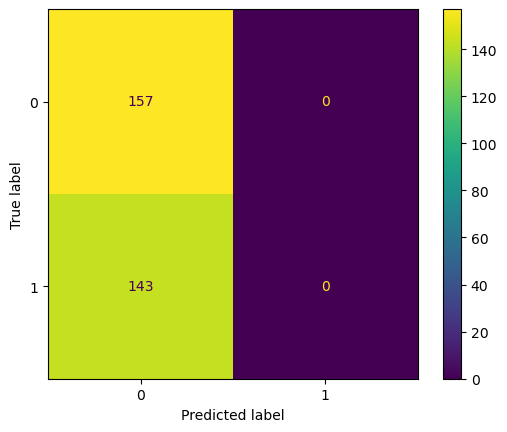

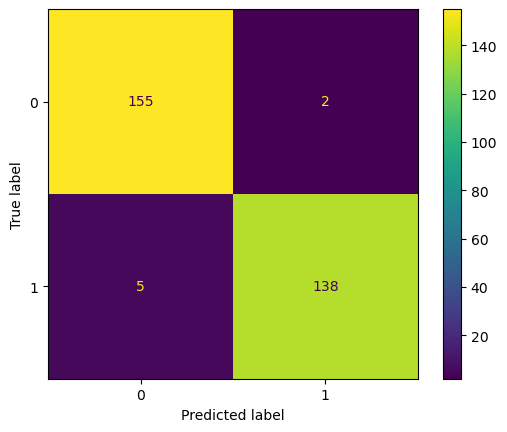

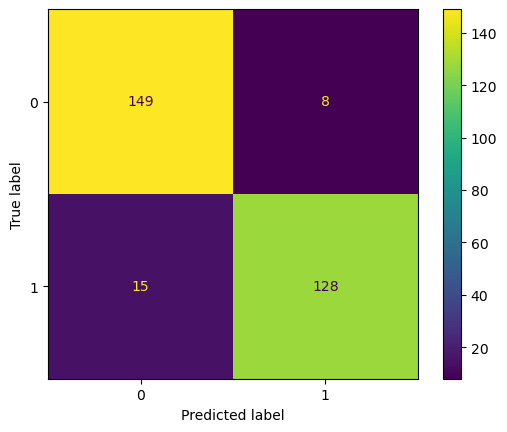

With 'newton-cg': 
               precision    recall  f1-score   support

           0       0.52      1.00      0.69       157
           1       0.00      0.00      0.00       143

    accuracy                           0.52       300
   macro avg       0.26      0.50      0.34       300
weighted avg       0.27      0.52      0.36       300

With 'lbfgs': 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

With 'liblinear': 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg      

/home/ajr/miniconda3/envs/DAA_312/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ajr/miniconda3/envs/DAA_312/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ajr/miniconda3/envs/DAA_312/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import sklearn as skl
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

#loading data

df_advertising = pd.read_csv('advertising.csv') 

#ver colunas

print(df_advertising.columns)

#VER SHAPE

#df_advertising.shape

#FORMATO DOS DADOS

#df_advertising.dtypes

#df_advertising.describe()

#MATRIZ DE CORRELAÇÃO - forte correlação entre o length of membership e o yearly amount spent, acaba por ser normal porque quem usa a aplicação à mais tempo normalmente investe mais dinheiro

#corr_matrix = df_advertising.corr(numeric_only=True)
#f, ax = plt.subplots(figsize=(10,14))
#sns.heatmap(corr_matrix, vmin=1, vmax=1,square=True, annot=True)

#PLOTS TO CHECK DATA

#sns.pairplot(df_advertising,hue="Clicked on Ad")


#VER MISSING VALUES

#print(df_advertising.isna().sum()) #Não há missing values

#CONTAR NÚMERO DE LINHAS DUPLICADAS

#print(df_advertising.duplicated().sum()) 

#Numero de linhas duplicadas = 0

#Eliminar coluna do email, address e avatar

df_clean = df_advertising.drop(columns=['City','Country','Ad Topic Line'])

x = df_clean[['Daily Time Spent on Site', 'Age','Area Income', 'Daily Internet Usage', 'Male']]
y = df_clean['Clicked on Ad']

x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 0.3, random_state=101)


#MODELO 1

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
starttime = time.process_time()
logmodel1 = LogisticRegression(random_state=2022, solver='newton-cg')
print(logmodel1)
logmodel1.fit(x_train_scaled,y_train)
endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")
predictions1 = logmodel1.predict(x_test)

#MODELO 2

starttime = time.process_time()
logmodel2 = LogisticRegression(random_state=2022, solver='lbfgs', max_iter=800)
print(logmodel2)
logmodel2.fit(x_train,y_train)
endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")
predictions2 = logmodel2.predict(x_test)

#MODELO 3

starttime = time.process_time()
logmodel3 = LogisticRegression(random_state=2022, solver='liblinear')
print(logmodel3)
logmodel3.fit(x_train,y_train)
endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")
predictions3 = logmodel3.predict(x_test)


#MATRIZES DE CONFUSÃO

# matriz de confusão para o modelo 1
cm1 = confusion_matrix(y_test, predictions1)
ConfusionMatrixDisplay(confusion_matrix=cm1).plot()
plt.show()

# matriz de confusão para o modelo 2
cm2 = confusion_matrix(y_test, predictions2)
ConfusionMatrixDisplay(confusion_matrix=cm2).plot()
plt.show()

# matriz de confusão para o modelo 3
cm3 = confusion_matrix(y_test, predictions3)
ConfusionMatrixDisplay(confusion_matrix=cm3).plot()
plt.show()

#NESTE CASO O MELHOR MODELO SERIA O MODELO 2 -> maior accuracy e valores TP E TN???

print("With 'newton-cg': \n", classification_report(y_test,predictions1))
print("With 'lbfgs': \n", classification_report(y_test,predictions2))
print("With 'liblinear': \n", classification_report(y_test,predictions3))


